# NN(Neural Network) Binary Citrus
- 오렌지인지 자몽인지 분류

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00
time: 493 µs (started: 2024-06-28 07:01:43 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 15.1 s (started: 2024-06-28 07:01:43 +00:00)


## 1. 데이터 준비

In [3]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

--2024-06-28 07:01:58--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv’

citrus.csv          100%[===================>] 301.07K  --.-KB/s    in 0.04s   

2024-06-28 07:01:58 (6.87 MB/s) - ‘citrus.csv’ saved [308294/308294]

time: 236 ms (started: 2024-06-28 07:01:58 +00:00)


In [4]:
citrus = pd.read_csv('citrus.csv')
citrus.shape

(10000, 6)

time: 80.8 ms (started: 2024-06-28 07:01:59 +00:00)


In [5]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


time: 114 ms (started: 2024-06-28 07:01:59 +00:00)


In [6]:
df = citrus.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
time: 74.4 ms (started: 2024-06-28 07:01:59 +00:00)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


time: 228 ms (started: 2024-06-28 07:01:59 +00:00)


### 범주형 변수

In [8]:
df['name'].nunique()

2

time: 5.74 ms (started: 2024-06-28 07:01:59 +00:00)


In [9]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

time: 8.77 ms (started: 2024-06-28 07:01:59 +00:00)


<Axes: xlabel='name'>

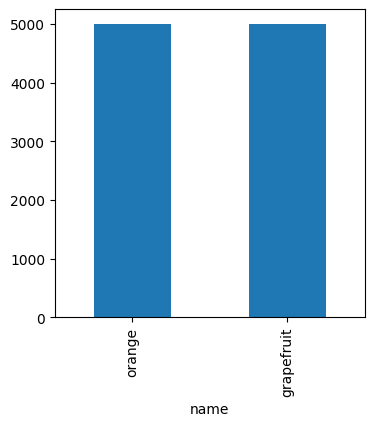

time: 371 ms (started: 2024-06-28 07:01:59 +00:00)


In [10]:
df['name'].value_counts().plot(kind='bar', figsize=(4, 4))

### 연속형 변수

In [11]:
df_orange = df[df['name'] == 'orange']
df_grape = df[df['name'] == 'grapefruit']

time: 8.47 ms (started: 2024-06-28 07:02:00 +00:00)


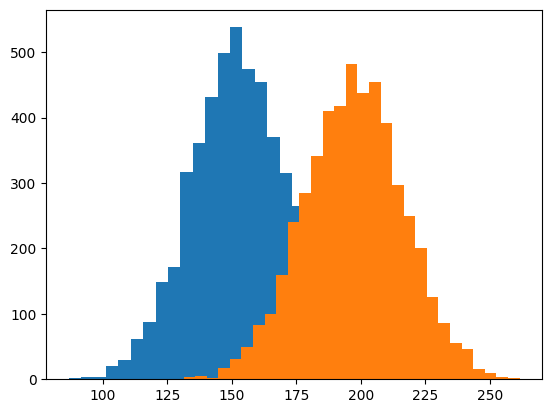

time: 1.1 s (started: 2024-06-28 07:02:00 +00:00)


In [12]:
plt.hist(df_orange['weight'], bins=30)
plt.hist(df_grape['weight'], bins=30)
plt.show()

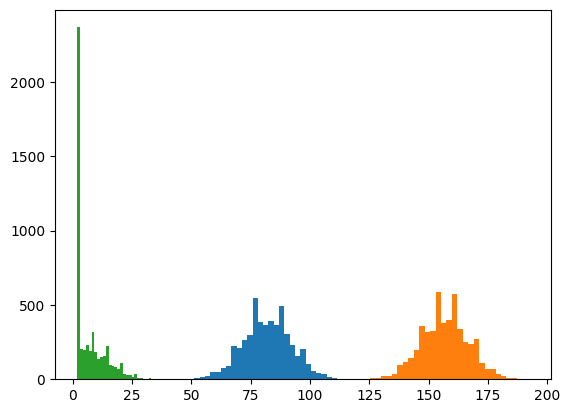

time: 1.2 s (started: 2024-06-28 07:02:01 +00:00)


In [13]:
plt.hist(df_orange['green'], bins=30)
plt.hist(df_orange['red'], bins=30)
plt.hist(df_orange['blue'], bins=30)
plt.show()

In [14]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

time: 11.4 ms (started: 2024-06-28 07:02:02 +00:00)


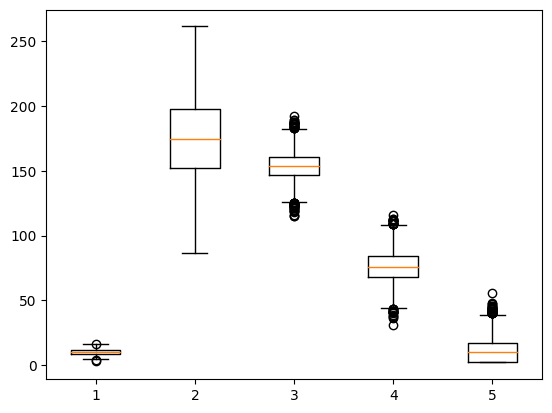

time: 701 ms (started: 2024-06-28 07:02:02 +00:00)


In [15]:
plt.boxplot(df[['diameter', 'weight', 'red', 'green', 'blue']])
plt.show()

### 결측치(Missing Values)

In [16]:
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

time: 29.8 ms (started: 2024-06-28 07:02:03 +00:00)


### 중복치

In [17]:
df.duplicated().sum()

0

time: 15.2 ms (started: 2024-06-28 07:02:03 +00:00)


## 2. 학습용, 테스트 분리

In [18]:
df = df.sample(frac = 1)
df.head()

,name,diameter,weight,red,green,blue
9842,grapefruit,13.76,233.14,145,65,3
2158,orange,8.27,149.46,130,82,25
6032,grapefruit,10.47,181.43,154,66,10
3438,orange,9.08,161.88,154,71,12
7779,grapefruit,11.64,200.15,145,74,14


time: 66.5 ms (started: 2024-06-28 07:02:05 +00:00)


In [19]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df) * 0.8)

time: 1.41 ms (started: 2024-06-28 07:02:14 +00:00)


In [20]:
train = df.iloc[:idx_train, :]
val = df.iloc[idx_train:idx_val, :]
test = df.iloc[idx_val:, :]

train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

time: 15.6 ms (started: 2024-06-28 07:02:16 +00:00)


### X, y 변수 분리

In [21]:
X_train = train.drop('name', axis = 1)
y_train = train['name']

time: 10.1 ms (started: 2024-06-28 07:02:18 +00:00)


In [22]:
X_val = val.drop('name', axis = 1)
y_val = val['name']

time: 6.89 ms (started: 2024-06-28 07:02:23 +00:00)


In [23]:
y_train.value_counts(), y_val.value_counts()

(name
 grapefruit    3008
 orange        2992
 Name: count, dtype: int64,
 name
 grapefruit    1011
 orange         989
 Name: count, dtype: int64)

time: 35.4 ms (started: 2024-06-28 07:02:30 +00:00)


## 스케일링

In [25]:
u = X_train.mean()
std = X_train.std()
u, std

(diameter      9.971150
 weight      174.988018
 red         153.699833
 green        75.948667
 blue         11.386667
 dtype: float64,
 diameter     1.968908
 weight      29.528697
 red         10.522968
 green       11.688775
 blue         9.047659
 dtype: float64)

time: 14.7 ms (started: 2024-06-28 07:02:40 +00:00)


In [27]:
X_train_s = (X_train - u) / std
X_train_s.head()

,diameter,weight,red,green,blue
9842,1.924341,1.969338,-0.826747,-0.936682,-0.926943
2158,-0.864007,-0.864516,-2.252200,0.517705,1.504625
6032,0.253364,0.218160,0.028525,-0.851130,-0.153262
3438,-0.452611,-0.443908,0.028525,-0.423369,0.067789
7779,0.847602,0.852120,-0.826747,-0.166713,0.288841


time: 53.9 ms (started: 2024-06-28 07:02:45 +00:00)


In [28]:
X_val_s = (X_val - u) / std
X_val_s.head()

,diameter,weight,red,green,blue
2366,-0.797980,-0.798139,0.313616,0.261048,0.067789
1974,-0.924954,-0.916668,0.313616,1.031018,-1.037469
9465,1.553577,1.564647,1.739069,0.175496,0.841470
5714,0.090837,0.053236,-1.396928,-1.535547,0.730944
5046,-0.615138,-0.790350,-0.731717,0.175496,0.178315


time: 19.7 ms (started: 2024-06-28 07:02:47 +00:00)


In [29]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': diameter      9.971150
 weight      174.988018
 red         153.699833
 green        75.948667
 blue         11.386667
 dtype: float64,
 'std': diameter     1.968908
 weight      29.528697
 red         10.522968
 green       11.688775
 blue         9.047659
 dtype: float64}

time: 17.7 ms (started: 2024-06-28 07:02:51 +00:00)


## 인코딩

In [30]:
label_dict = {'grapefruit':0, 'orange':1}

time: 594 µs (started: 2024-06-28 07:02:53 +00:00)


In [31]:
y_train

9842    grapefruit
2158        orange
6032    grapefruit
3438        orange
7779    grapefruit
           ...    
956         orange
7095    grapefruit
5019    grapefruit
1250        orange
5679    grapefruit
Name: name, Length: 6000, dtype: object

time: 5.33 ms (started: 2024-06-28 07:02:55 +00:00)


In [32]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)
y_train_e, y_val_e

(9842    0
 2158    1
 6032    0
 3438    1
 7779    0
        ..
 956     1
 7095    0
 5019    0
 1250    1
 5679    0
 Name: name, Length: 6000, dtype: int64,
 2366    1
 1974    1
 9465    0
 5714    0
 5046    0
        ..
 6699    0
 8695    0
 9584    0
 2993    1
 6688    0
 Name: name, Length: 2000, dtype: int64)

time: 21.9 ms (started: 2024-06-28 07:03:01 +00:00)


In [33]:
X_train_s

,diameter,weight,red,green,blue
9842,1.924341,1.969338,-0.826747,-0.936682,-0.926943
2158,-0.864007,-0.864516,-2.252200,0.517705,1.504625
6032,0.253364,0.218160,0.028525,-0.851130,-0.153262
3438,-0.452611,-0.443908,0.028525,-0.423369,0.067789
7779,0.847602,0.852120,-0.826747,-0.166713,0.288841
...,...,...,...,...,...
956,-1.310955,-1.308490,0.598706,-0.166713,-0.926943
7095,0.624128,0.624206,-0.066505,0.945465,0.067789
5019,-0.813217,-0.945454,0.218585,-0.765578,1.173047
1250,-1.178902,-1.179802,1.168888,-0.166713,0.178315


time: 46.8 ms (started: 2024-06-28 07:03:11 +00:00)


In [34]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

time: 2.35 ms (started: 2024-06-28 07:03:13 +00:00)


In [35]:
print(X_train_s.shape, y_train_e.shape)
print(X_val_s.shape, y_val_e.shape)
print(type(X_train_s), type(y_train_e))
print(type(X_val_s), type(y_val_e))

(6000, 5) (6000,)
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 1.13 ms (started: 2024-06-28 07:03:15 +00:00)


## 모델 학습

In [36]:
X_train_s.shape

(6000, 5)

time: 4.64 ms (started: 2024-06-28 07:03:29 +00:00)


In [38]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(5, )),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

time: 121 ms (started: 2024-06-28 07:03:56 +00:00)


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                96        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 313 (1.22 KB)
Trainable params: 313 (1.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 103 ms (started: 2024-06-28 07:04:02 +00:00)


In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

time: 42.4 ms (started: 2024-06-28 07:04:40 +00:00)


In [43]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_e,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2
                    )

Epoch 1/100
150/150 [==============================] - 3s 7ms/step - loss: 0.5138 - accuracy: 0.8465 - val_loss: 0.3258 - val_accuracy: 0.9192
Epoch 2/100
150/150 [==============================] - 1s 8ms/step - loss: 0.2256 - accuracy: 0.9294 - val_loss: 0.1859 - val_accuracy: 0.9275
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1797 - accuracy: 0.9317 - val_loss: 0.1804 - val_accuracy: 0.9250
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1754 - accuracy: 0.9335 - val_loss: 0.1799 - val_accuracy: 0.9283
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1730 - accuracy: 0.9327 - val_loss: 0.1786 - val_accuracy: 0.9283
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1714 - accuracy: 0.9325 - val_loss: 0.1777 - val_accuracy: 0.9283
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1702 - accuracy: 0.9325 - val_loss: 0.1777 - val_accuracy: 0.9308

In [44]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.59 ms (started: 2024-06-28 07:07:16 +00:00)


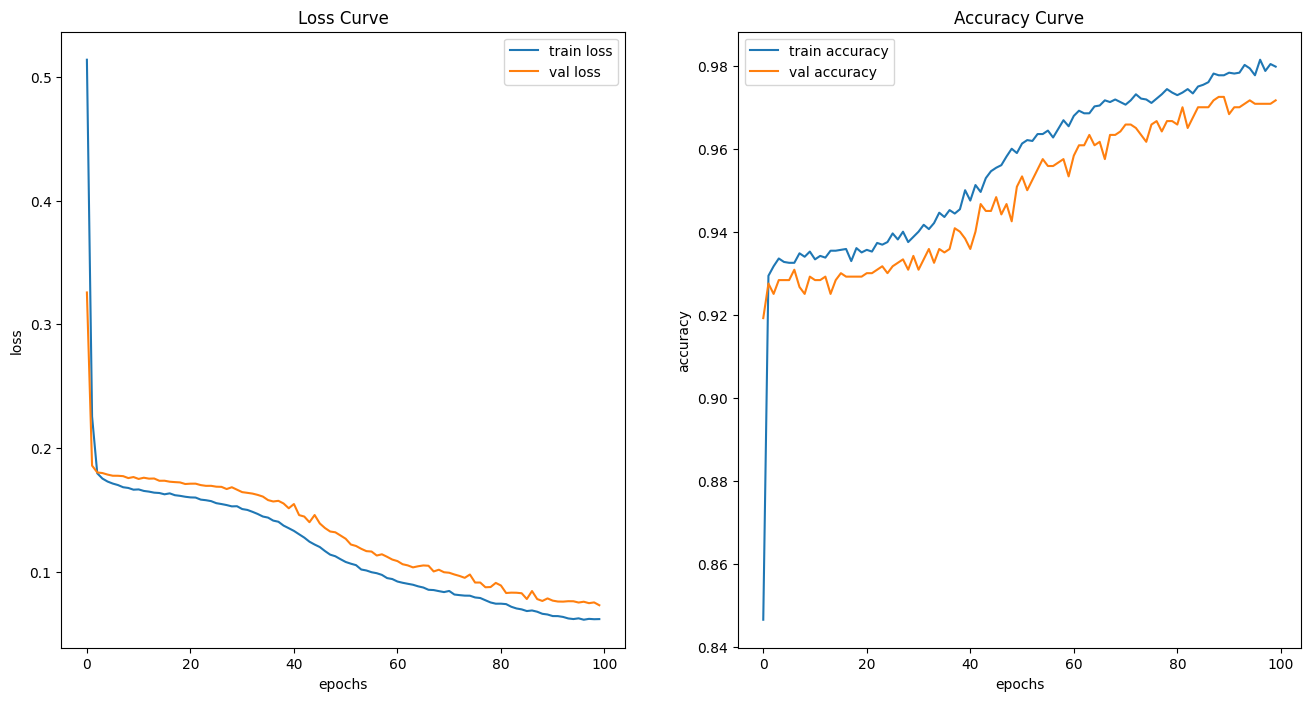

time: 659 ms (started: 2024-06-28 07:07:16 +00:00)


In [45]:
plot_history(history)

## 예측

In [46]:
# test 데이터 사용
test.shape

(2000, 6)

time: 4.13 ms (started: 2024-06-28 07:07:23 +00:00)


In [47]:
test.head()

,name,diameter,weight,red,green,blue
3965,orange,9.49,168.44,167,81,10
903,orange,7.33,135.78,145,82,2
2948,orange,8.77,156.95,160,80,2
3198,orange,8.92,159.48,171,79,2
135,orange,6.01,116.36,154,69,4


time: 41.5 ms (started: 2024-06-28 07:07:24 +00:00)


In [48]:
X_test = test.drop('name', axis = 1)
y_test = test['name']

time: 2.92 ms (started: 2024-06-28 07:07:27 +00:00)


In [49]:
#X_test_s = (X_test - ss_dic['mean']) / ss_dic['std']
X_test_s = (X_test - u) / std
y_test_e = y_test.map(label_dict)

time: 4.86 ms (started: 2024-06-28 07:07:29 +00:00)


In [50]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

time: 1.15 ms (started: 2024-06-28 07:07:31 +00:00)


In [51]:
X_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

time: 3.67 ms (started: 2024-06-28 07:07:33 +00:00)


In [54]:
y_pred = model.predict(X_test_s)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred

63/63 [==============================] - 0s 4ms/step


array([1, 1, 1, ..., 0, 1, 0])

time: 883 ms (started: 2024-06-28 07:07:59 +00:00)


In [55]:
y_test_e

array([1, 1, 1, ..., 0, 1, 0])

time: 12.8 ms (started: 2024-06-28 07:08:08 +00:00)


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='binary'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 740 ms (started: 2024-06-28 07:08:13 +00:00)


accuracy: 0.9745
recall_score: 0.9607458292443573
precision_score: 0.9888888888888889
f1_score: 0.9746142359382777


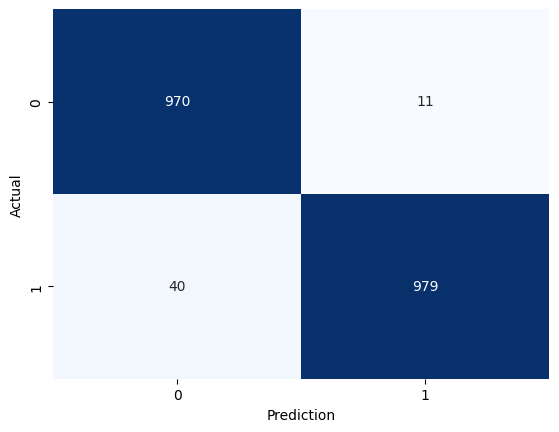

time: 488 ms (started: 2024-06-28 07:08:18 +00:00)


In [57]:
print_metrics(y_test_e, y_pred)